<a href="https://colab.research.google.com/github/DiegoLuis62/Ciencias-de-datos---PF/blob/main/Heart_Disease_Cleanse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Carga y exploración inicial del dataset**

In [2]:
# Bibliotecas estándar
import os
import sys

# Manipulación de datos
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score
)
from sklearn.impute import SimpleImputer
import lightgbm as lgb

In [3]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/10 semestre/PF-Dataset"
df = pd.read_csv(dataset_path + "/heart_2022_with_nans.csv")
# Link del dataset : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Mounted at /content/drive


In [4]:
print(df.shape)
print("")
df.head()


(445132, 40)



,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

# **2. Análisis de valores nulos: cantidad, porcentaje y tipo de datos**

En este análisis, se identifican las columnas que contienen valores nulos dentro del dataset. Se calcula la cantidad y el porcentaje de datos faltantes en cada variable, además de determinar su tipo de dato (numérico o categórico). Esto permite evaluar el impacto de los valores ausentes y definir estrategias adecuadas para la limpieza y el tratamiento de los datos.

In [6]:
missing_values = df.isnull().sum()

# Filtrar solo las columnas con NaN
missing_columns = missing_values[missing_values > 0]

# Obtener los tipos de datos de esas columnas
dtypes = df.dtypes[missing_columns.index]

# Crear un DataFrame con la información
missing_info = pd.DataFrame({
    "Missing Values": missing_columns,
    "Percentage": (missing_columns / len(df)) * 100,
    "Data Type": dtypes
})


missing_info

,Missing Values,Percentage,Data Type
GeneralHealth,1198,0.269134,object
PhysicalHealthDays,10927,2.454777,float64
MentalHealthDays,9067,2.036924,float64
LastCheckupTime,8308,1.866413,object
PhysicalActivities,1093,0.245545,object
SleepHours,5453,1.225030,float64
RemovedTeeth,11360,2.552052,object
HadHeartAttack,3065,0.688560,object
HadAngina,4405,0.989594,object
HadStroke,1557,0.349784,object


In [7]:
for col in df: # Verificar si hay una columna o atributo que no aporte, ejemplo si tiene 1 subnivel, no nos sirve
  print(f"Columna {col}: {df[col].nunique() } subniveles ")

Columna State: 54 subniveles 
Columna Sex: 2 subniveles 
Columna GeneralHealth: 5 subniveles 
Columna PhysicalHealthDays: 31 subniveles 
Columna MentalHealthDays: 31 subniveles 
Columna LastCheckupTime: 4 subniveles 
Columna PhysicalActivities: 2 subniveles 
Columna SleepHours: 24 subniveles 
Columna RemovedTeeth: 4 subniveles 
Columna HadHeartAttack: 2 subniveles 
Columna HadAngina: 2 subniveles 
Columna HadStroke: 2 subniveles 
Columna HadAsthma: 2 subniveles 
Columna HadSkinCancer: 2 subniveles 
Columna HadCOPD: 2 subniveles 
Columna HadDepressiveDisorder: 2 subniveles 
Columna HadKidneyDisease: 2 subniveles 
Columna HadArthritis: 2 subniveles 
Columna HadDiabetes: 4 subniveles 
Columna DeafOrHardOfHearing: 2 subniveles 
Columna BlindOrVisionDifficulty: 2 subniveles 
Columna DifficultyConcentrating: 2 subniveles 
Columna DifficultyWalking: 2 subniveles 
Columna DifficultyDressingBathing: 2 subniveles 
Columna DifficultyErrands: 2 subniveles 
Columna SmokerStatus: 4 subniveles 
Colum

In [8]:
# Verificar cantidad de filas duplicadas en el dataset original
duplicados = df.duplicated().sum()

print(f"Número de filas duplicadas en el dataset original: {duplicados}")
df.drop_duplicates(inplace=True)



Número de filas duplicadas en el dataset original: 157


Acabo de eliminar 157 datos duplicados del dataset original para evitar tener que eliminarlos uno por uno al copiar los demás datasets.

#**3) Limpieza de los Datasets**



#Limpieza de Dataset por Eliminación



In [9]:
df_cleaned = df.dropna()  # Elimina filas con valores nulos
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de limpieza: {df_cleaned.shape[0]}")



Filas originales: 444975
Filas después de limpieza: 246013


#Limpieza de Dataset Usando Moda, Mediana

In [10]:



df_imputado = df.copy()

# Identificar variables categóricas y numéricas
categorical_vars = df_imputado.select_dtypes(include=['object']).columns
binary_vars = [var for var in categorical_vars if df_imputado[var].nunique() == 2]  # Variables binarias
num_vars = df_imputado.select_dtypes(include=['float64']).columns

# Imputación con moda para categóricas y binarias
imputer_moda = SimpleImputer(strategy="most_frequent")
df_imputado[categorical_vars] = imputer_moda.fit_transform(df_imputado[categorical_vars])

# Imputación con mediana para variables numéricas
imputer_mediana = SimpleImputer(strategy="median")
df_imputado[num_vars] = imputer_mediana.fit_transform(df_imputado[num_vars])

# Guardar dataset imputado
df_imputado.to_csv("dataset_imputado.csv", index=False)




In [11]:
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de imputar: {df_imputado.shape[0]}")

Filas originales: 444975
Filas después de imputar: 444975


# **4) Comparación de columnas numéricas del dataset original, eliminación de datos nulos e imputación.**

**Dataset con datos Originales**

In [12]:

df.describe()


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434053.000000,435913.000000,439527.000000,416470.000000,403044.000000,396316.000000
mean,4.349372,4.384164,7.022909,1.702690,83.074632,28.529907
std,8.689968,8.388541,1.502618,0.107178,21.448241,6.554917
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


**Dataset con datos nulos eliminados**

In [13]:
df_cleaned.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


**Dataset con datos Imputados**

In [14]:

df_imputado.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,444975.000000,444975.000000,444975.000000,444975.000000,444975.000000,444975.000000
mean,4.242616,4.294879,7.022628,1.702518,82.854634,28.410723
std,8.609002,8.325745,1.493393,0.103690,20.424073,6.195490
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.410000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,4.000000,8.000000,1.780000,91.630000,31.010000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


# **Análisis Comparativo de Métodos para el Manejo de Datos Faltantes**

En el presente análisis, se compararon dos estrategias para tratar los datos faltantes en el dataset: la eliminación de registros con valores nulos y la imputación mediante la moda (para datos categóricos) y la mediana (para datos numéricos). A continuación, se presentan los hallazgos clave.

# 1️⃣ Eliminación de Datos Faltantes

Se redujo significativamente la cantidad de datos, pasando de ~434,205 registros a 246,022 en algunas columnas, representando una pérdida aproximada del 43.3% de la información.

La media de variables clave, como el Índice de Masa Corporal (BMI), pasó de 28.53 en el dataset original a 28.67 tras la eliminación de datos, lo que sugiere que los valores eliminados tenían una distribución diferente al conjunto de datos restante.

Se observó una disminución en la dispersión de los datos (medida a través de la desviación estándar), lo que indica una posible pérdida de variabilidad en la muestra.

# 2️⃣ Imputación con Moda y Mediana

Se conservaron 445,132 registros, manteniendo la totalidad de la muestra sin pérdida de información.

La media del BMI fue 28.41, mucho más cercana al valor original (28.53) en comparación con la eliminación de datos.

La desviación estándar disminuyó ligeramente en comparación con el dataset original, pero sin alterar significativamente la variabilidad inherente a los datos.

# 📌 Conclusión

El análisis comparativo evidencia que la eliminación de datos genera una pérdida considerable de información y puede introducir sesgos en la muestra al alterar las estadísticas descriptivas de las variables. En contraste, la imputación con moda y mediana preserva la estructura del dataset y mantiene los valores estadísticos más cercanos a los originales.

Por lo tanto, para evitar la pérdida de información valiosa y minimizar el sesgo en futuros análisis, se recomienda la imputación de valores faltantes en lugar de la eliminación de registros.

# **5) Análisis de datos**

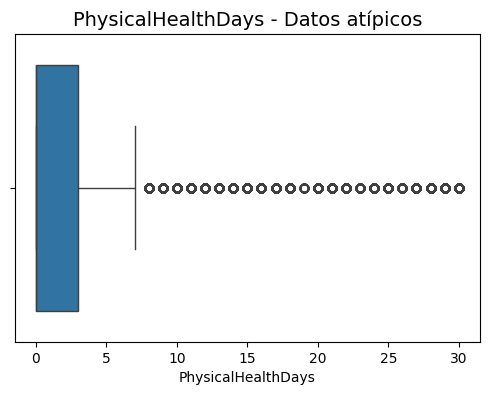

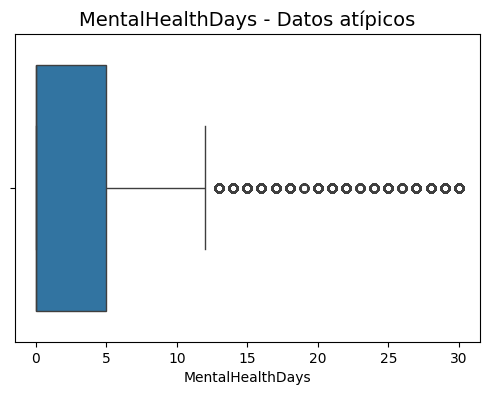

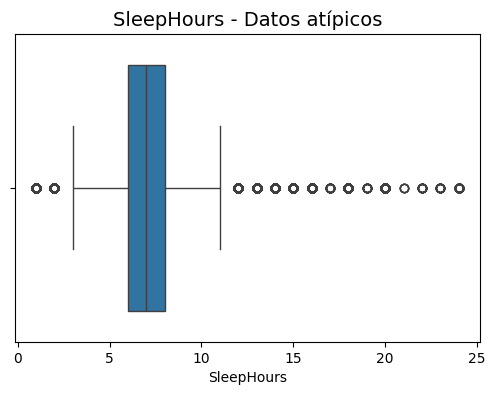

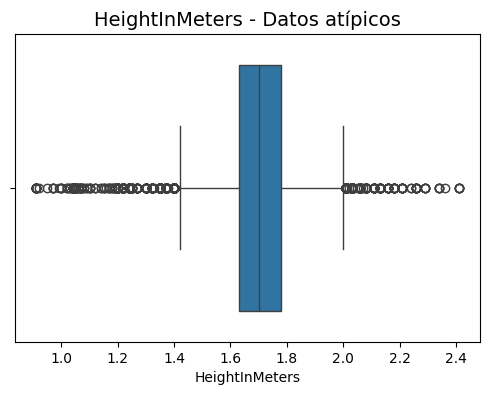

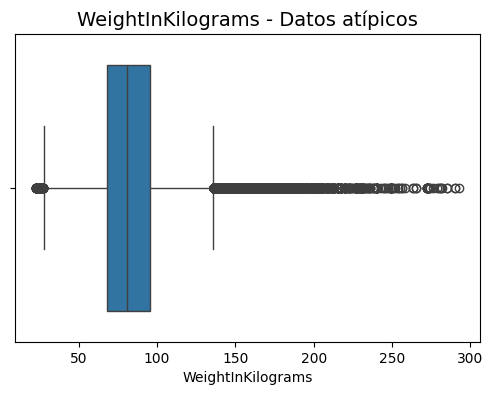

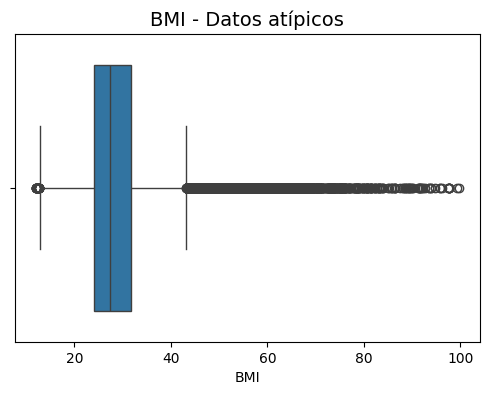

In [15]:


# Suponiendo que tienes tu DataFrame llamado 'df'
numerical_columns = [
    "PhysicalHealthDays", "MentalHealthDays", "SleepHours",
    "HeightInMeters", "WeightInKilograms", "BMI"
]

# Crear boxplots para cada columna numérica
for col in numerical_columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Datos atípicos', fontsize=14)
    plt.xlabel(col)
    plt.savefig(f"{col}_boxplot.png")  # Guarda la imagen
    plt.show()







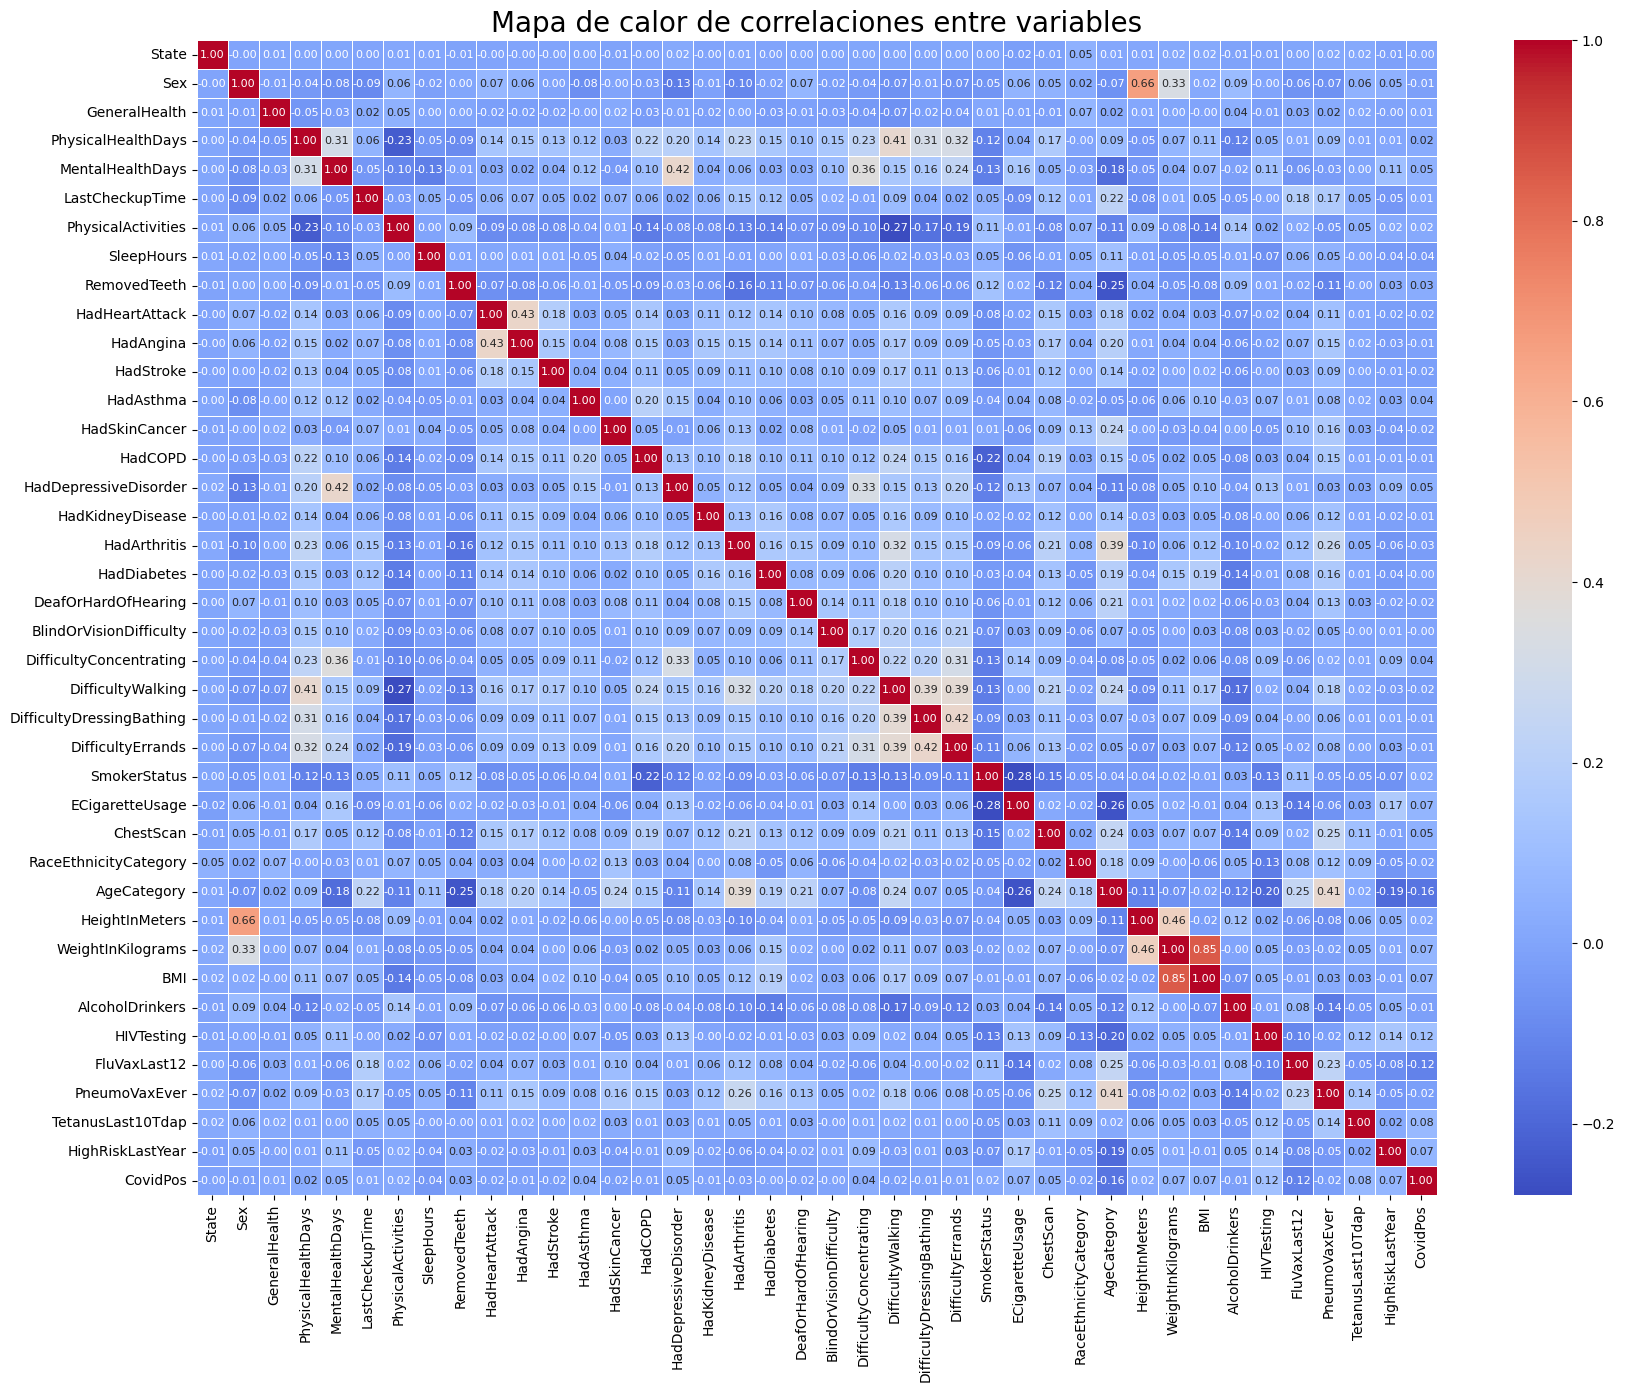

In [16]:


# Convertir variables categóricas a numéricas usando codificación ordinal
df_encoded = df_imputado.copy()

categorical_columns = [
    "State", "Sex", "GeneralHealth", "LastCheckupTime", "PhysicalActivities",
    "RemovedTeeth", "HadHeartAttack", "HadAngina", "HadStroke", "HadAsthma",
    "HadSkinCancer", "HadCOPD", "HadDepressiveDisorder", "HadKidneyDisease",
    "HadArthritis", "HadDiabetes", "DeafOrHardOfHearing", "BlindOrVisionDifficulty",
    "DifficultyConcentrating", "DifficultyWalking", "DifficultyDressingBathing",
    "DifficultyErrands", "SmokerStatus", "ECigaretteUsage", "ChestScan",
    "RaceEthnicityCategory", "AgeCategory", "AlcoholDrinkers", "HIVTesting",
    "FluVaxLast12", "PneumoVaxEver", "TetanusLast10Tdap", "HighRiskLastYear", "CovidPos"
]

for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes  # Asigna códigos numéricos a las categorías

# Calcular la matriz de correlación
corr_matrix = df_encoded.corr()

# Crear el heatmap con valores numéricos visibles y mayor tamaño
plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8}  # Reduce el tamaño de los números
)

# Configurar etiquetas
plt.xticks(rotation=90)  # Rotar etiquetas del eje X para mejor visualización
plt.yticks(rotation=0)   # Mantener las etiquetas del eje Y horizontales
plt.title("Mapa de calor de correlaciones entre variables", fontsize=20)

# Mostrar el heatmap
plt.show()



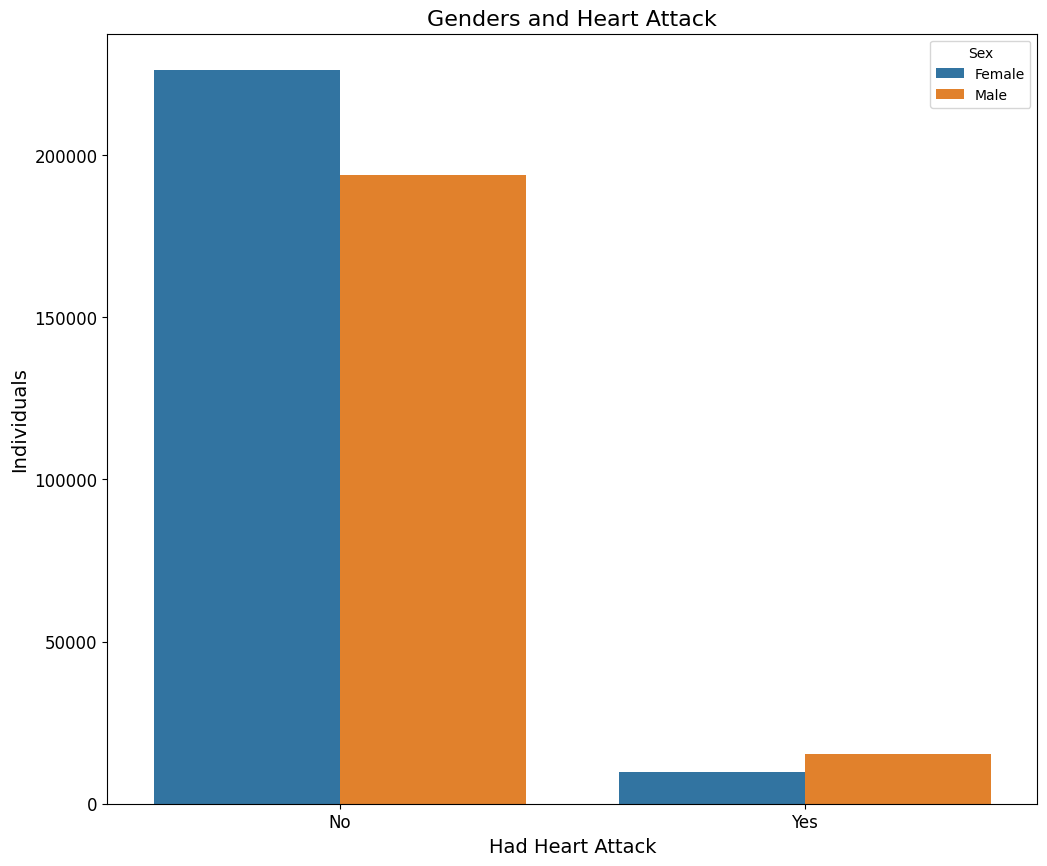

In [17]:
# Crear el gráfico de conteo con df_imputado
ax = sns.countplot(data=df_imputado, x='HadHeartAttack', hue='Sex')

# Función para personalizar el gráfico
def customize_plot(ax, title, xlabel, ylabel, width, height):
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gcf().set_size_inches(width, height)  # Ajustar tamaño de la figura

# Aplicar la personalización
customize_plot(ax, "Genders and Heart Attack", "Had Heart Attack", "Individuals", 12, 10)

# Guardar el gráfico en un archivo
scatter_fig = ax.get_figure()
scatter_fig.savefig('genderHeartAttack.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

<ipython-input-18-786e45c8d5ae>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


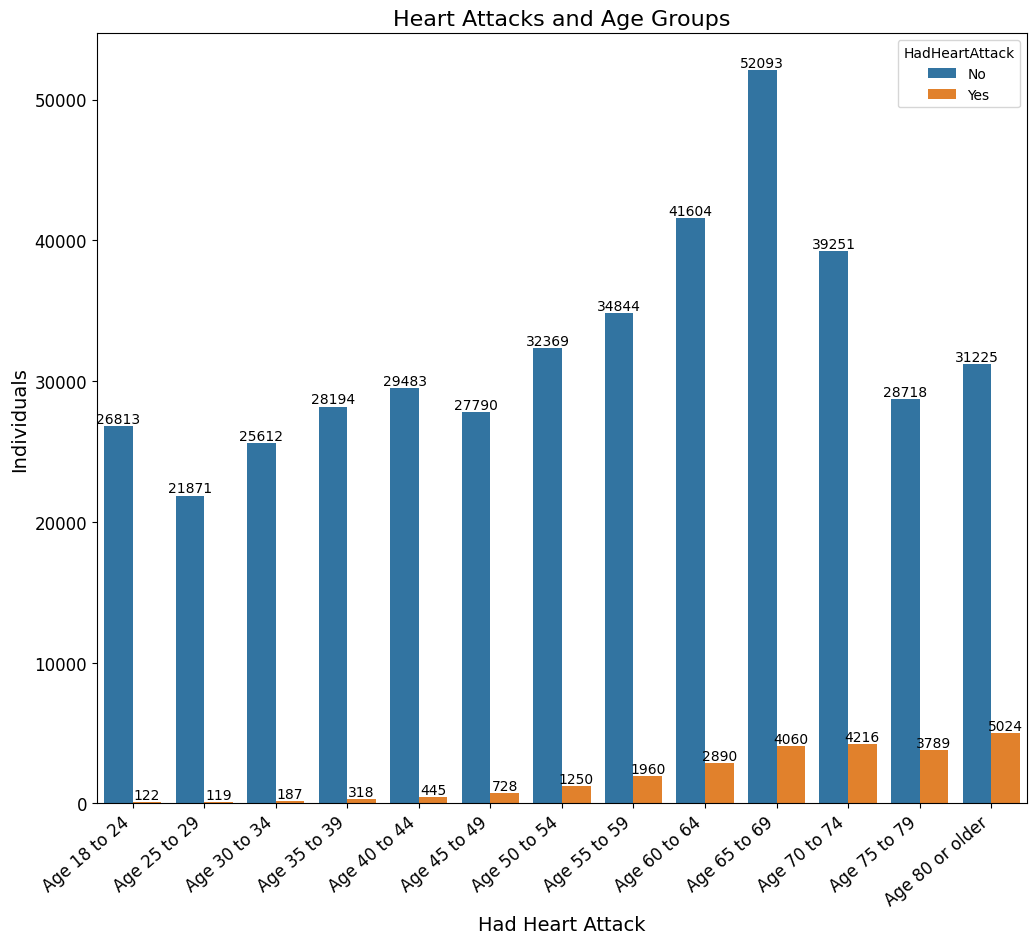

In [18]:
# Asegúrate de que 'AgeCategory' sea una columna categórica
df_imputado['AgeCategory'] = df_imputado['AgeCategory'].astype('category')

# Crear el gráfico de barras
ax = sns.countplot(data=df_imputado, x='AgeCategory', hue='HadHeartAttack')

# Rotar etiquetas del eje X para mejorar legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Personalizar el gráfico
customize_plot(ax, "Heart Attacks and Age Groups", "Had Heart Attack", "Individuals", 12, 10)

# Añadir etiquetas a las barras
for c in ax.containers:
    ax.bar_label(c)

# Guardar el gráfico
scatter_fig = ax.get_figure()
scatter_fig.savefig('countplotByAge.png')

# Mostrar el gráfico
plt.show()

# **6) Árbol RandomForestClassifier**


In [19]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      444975 non-null  object  
 1   Sex                        444975 non-null  object  
 2   GeneralHealth              444975 non-null  object  
 3   PhysicalHealthDays         444975 non-null  float64 
 4   MentalHealthDays           444975 non-null  float64 
 5   LastCheckupTime            444975 non-null  object  
 6   PhysicalActivities         444975 non-null  object  
 7   SleepHours                 444975 non-null  float64 
 8   RemovedTeeth               444975 non-null  object  
 9   HadHeartAttack             444975 non-null  object  
 10  HadAngina                  444975 non-null  object  
 11  HadStroke                  444975 non-null  object  
 12  HadAsthma                  444975 non-null  object  
 13  HadSkinCancer      

In [20]:
for col in df: # Verificar si hay una columna o atributo que no aporte, ejemplo si tiene 1 subnivel, no nos sirve
  print(f"Columna {col}: {df_imputado[col].nunique() } subniveles ")

Columna State: 54 subniveles 
Columna Sex: 2 subniveles 
Columna GeneralHealth: 5 subniveles 
Columna PhysicalHealthDays: 31 subniveles 
Columna MentalHealthDays: 31 subniveles 
Columna LastCheckupTime: 4 subniveles 
Columna PhysicalActivities: 2 subniveles 
Columna SleepHours: 24 subniveles 
Columna RemovedTeeth: 4 subniveles 
Columna HadHeartAttack: 2 subniveles 
Columna HadAngina: 2 subniveles 
Columna HadStroke: 2 subniveles 
Columna HadAsthma: 2 subniveles 
Columna HadSkinCancer: 2 subniveles 
Columna HadCOPD: 2 subniveles 
Columna HadDepressiveDisorder: 2 subniveles 
Columna HadKidneyDisease: 2 subniveles 
Columna HadArthritis: 2 subniveles 
Columna HadDiabetes: 4 subniveles 
Columna DeafOrHardOfHearing: 2 subniveles 
Columna BlindOrVisionDifficulty: 2 subniveles 
Columna DifficultyConcentrating: 2 subniveles 
Columna DifficultyWalking: 2 subniveles 
Columna DifficultyDressingBathing: 2 subniveles 
Columna DifficultyErrands: 2 subniveles 
Columna SmokerStatus: 4 subniveles 
Colum

<ipython-input-21-d442a770e6bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


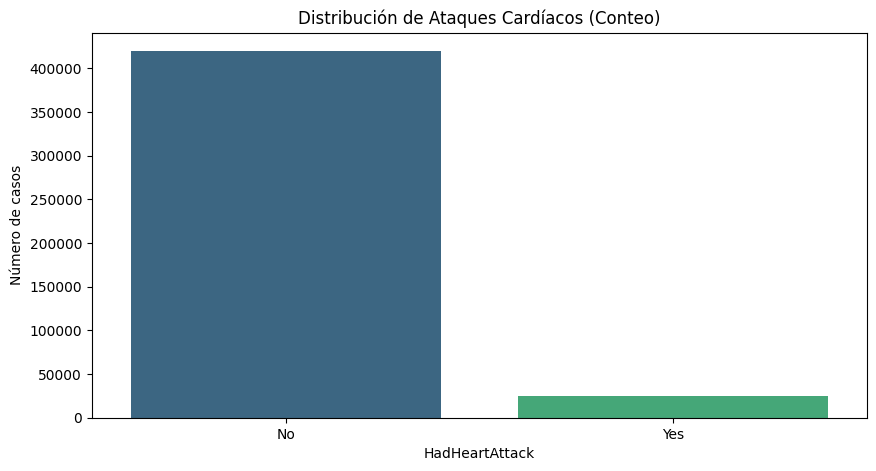

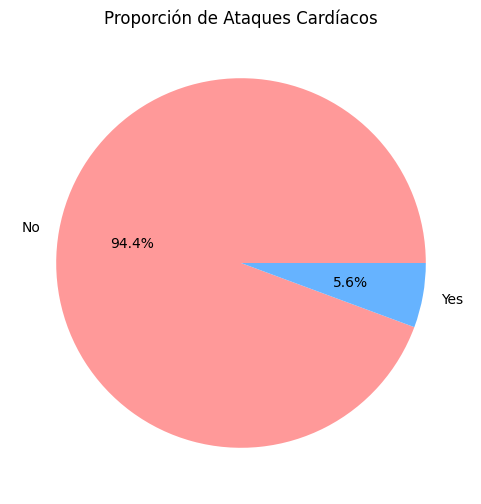

In [21]:

# 1. Conteo de clases
class_counts = df_imputado['HadHeartAttack'].value_counts()

# 2. Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribución de Ataques Cardíacos (Conteo)")
plt.xlabel("HadHeartAttack")
plt.ylabel("Número de casos")
plt.show()

# 3. Gráfico de pastel (porcentajes)
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Proporción de Ataques Cardíacos")
plt.show()

In [22]:
# Obtener valores únicos de todas las columnas en df_imputado
for col in df_imputado.columns:
    print(f"\n Valores únicos en la columna {col}: {df_imputado[col].unique()}\n")



 Valores únicos en la columna State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']


 Valores únicos en la columna Sex: ['Female' 'Male']


 Valores únicos en la columna GeneralHealth: ['Very good' 'Excellent' 'Fair' 'Poor' 'Good']


 Valores únicos en la columna PhysicalHealthDays: [ 0.  2.  1.  8.  5. 30.  4. 23. 14. 15.  3. 10.  7. 25.  6. 21. 20. 29.
 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 19.

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value

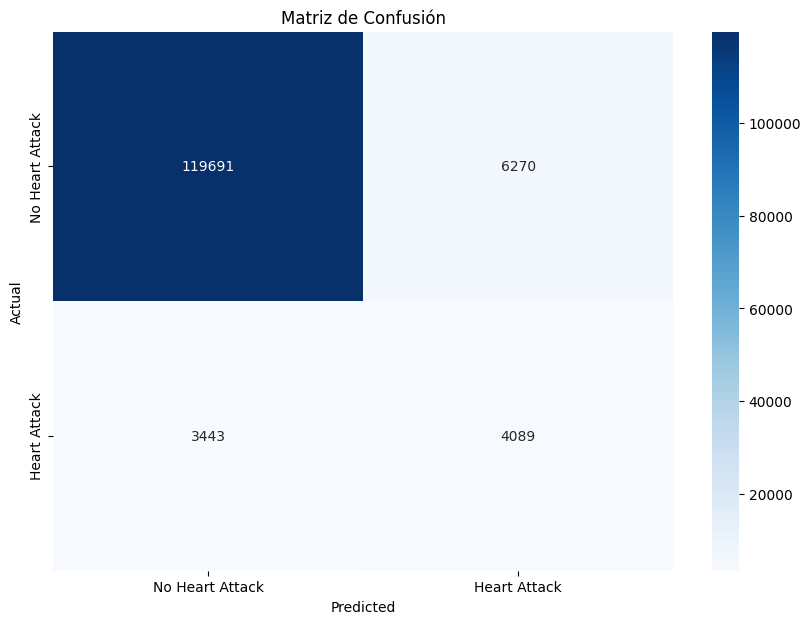

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


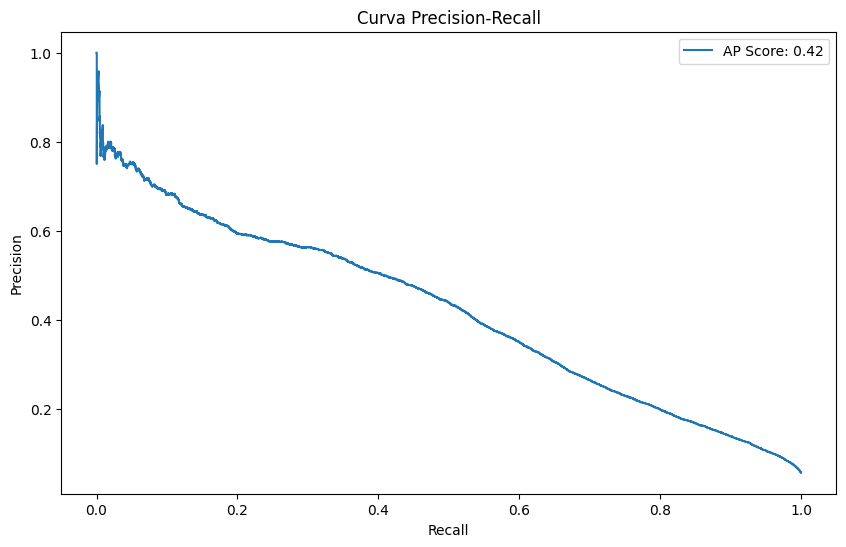

In [23]:


# 1. Preparación de Datos
# --------------------------------------------------
target_column = "HadHeartAttack"

# Convertir la variable objetivo a categórica directamente
df_imputado[target_column] = df_imputado[target_column].astype('category')

# Definir variables predictoras (X) y la variable objetivo (y)
X = df_imputado.drop(columns=[target_column])
y = df_imputado[target_column]  # Mantenemos como categoría

# Identificar columnas categóricas en X
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
X[categorical_columns] = X[categorical_columns].astype('category')

# 2. División de Datos
# --------------------------------------------------
# Dividir manteniendo las categorías originales
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=87, stratify=y
)

# 3. Configuración y Entrenamiento del Modelo
# --------------------------------------------------
lgb_model = lgb.LGBMClassifier(
    boosting_type='goss',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=-1,
    num_leaves=63,
    min_data_in_leaf=30,
    feature_fraction=0.8,
    lambda_l1=0.1,
    lambda_l2=0.1,
    # class_weight='balanced',
    class_weight={'No': 1, 'Yes': 5},
    random_state=42,
    objective='binary',  # Asegurar que es para clasificación binaria
    metric='binary_logloss'
)

# Entrenamiento con early stopping (una sola vez)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='binary_logloss',
    categorical_feature=categorical_columns,
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# 4. Predicción y Evaluación
# --------------------------------------------------
# Realizar predicciones (ya están en las categorías originales)
y_pred = lgb_model.predict(X_test)

# Calcular métricas directamente con las categorías
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Imprimir métricas
print("\nMétricas de Evaluación:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 5. Visualización
# --------------------------------------------------
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Curva Precision-Recall (Opcional)

y_probs = lgb_model.predict_proba(X_test)[:, 1]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_probs, pos_label='Yes')
ap_score = average_precision_score(y_test, y_probs, pos_label='Yes')

plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, label=f'AP Score: {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

# **Mal Rendimiento**
Como el rendimiento no es tan bueno, ajustaremos el dataset conservando solo las columnas relevantes, ya que las demás están afectando negativamente el rendimiento

In [24]:
columnas_a_eliminar = [
    # variable objectivo. así que no debe estar en x para predecirla así misma
    'HadHeartAttack',
    'State',  # Ubicación geográfica no es un factor médico directo
    'DeafOrHardOfHearing',  # Problemas auditivos no relacionados
    'BlindOrVisionDifficulty',  # Problemas visuales no relacionados
    'HIVTesting',  # No directamente relacionado con salud cardíaca
    'RemovedTeeth',  # Salud dental no es predictor cardíaco
    'ChestScan',  # Es un examen, no un factor de riesgo
    'FluVaxLast12',  # Vacuna de gripe no es relevante
    'PneumoVaxEver',  # Vacuna neumococo no es relevante
    'CovidPos',  # Muy reciente para tener datos concluyentes
    'HeightInMeters',  # Mejor usar BMI que combina altura/peso
    'WeightInKilograms',  # Mejor usar BMI
    'DifficultyConcentrating',  # Síntoma muy genérico
    'DifficultyDressingBathing',  # Movilidad no específica cardíaca
    'DifficultyErrands'  # Movilidad no específica cardíaca
]


variables_clave = [


    # Factores demográficos básicos
    'Sex',
    'AgeCategory',

    # Salud general
    'GeneralHealth',
    'PhysicalHealthDays',
    'MentalHealthDays',
    'BMI',

    # Factores de riesgo cardiovascular
    'HadAngina',
    'HadStroke',
    'HadAsthma',
    'HadCOPD',
    'HadDiabetes',
    'HadKidneyDisease',
    'HadArthritis',

    # Hábitos de vida
    'SmokerStatus',
    'ECigaretteUsage',
    'AlcoholDrinkers',
    'PhysicalActivities',
    'SleepHours',

    # Comorbilidades relevantes
    'HadDepressiveDisorder',
    'HadSkinCancer',  # Algunos estudios muestran correlación

    # Exámenes médicos
    'LastCheckupTime',
    'HighRiskLastYear',

    # Dificultades físicas relacionadas
    'DifficultyWalking'  # Puede indicar problemas circulatorios
]

In [25]:
y_test.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [26]:
y_train.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [27]:
X.shape

(444975, 39)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      444975 non-null  category
 1   Sex                        444975 non-null  category
 2   GeneralHealth              444975 non-null  category
 3   PhysicalHealthDays         444975 non-null  float64 
 4   MentalHealthDays           444975 non-null  float64 
 5   LastCheckupTime            444975 non-null  category
 6   PhysicalActivities         444975 non-null  category
 7   SleepHours                 444975 non-null  float64 
 8   RemovedTeeth               444975 non-null  category
 9   HadAngina                  444975 non-null  category
 10  HadStroke                  444975 non-null  category
 11  HadAsthma                  444975 non-null  category
 12  HadSkinCancer              444975 non-null  category
 13  HadCOPD            

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 17576, number of negative: 293906
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

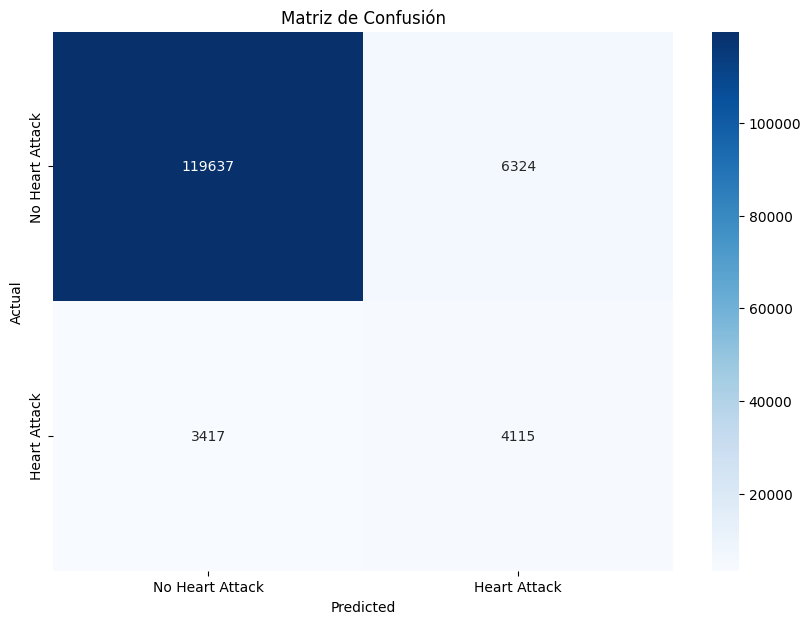

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


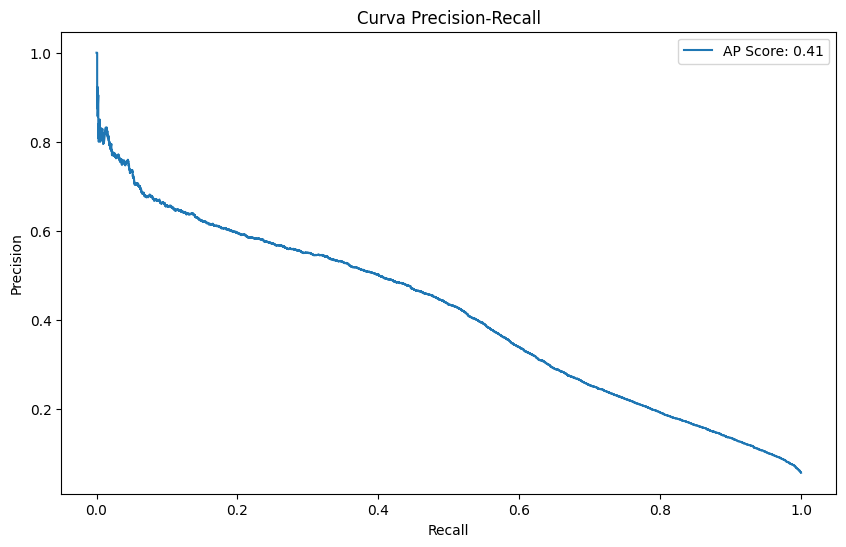

In [29]:


# 1. Preparación de Datos
# --------------------------------------------------
target_column = "HadHeartAttack"

# Convertir la variable objetivo a categórica directamente
df_imputado[target_column] = df_imputado[target_column].astype('category')

# Definir variables predictoras (X) y la variable objetivo (y)
X = df_imputado.drop(columns=columnas_a_eliminar)  # Elimina todo de una vez
y = df_imputado[target_column]  # Mantenemos como categoría

# Identificar columnas categóricas en X
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
X[categorical_columns] = X[categorical_columns].astype('category')

# 2. División de Datos
# --------------------------------------------------
# Dividir manteniendo las categorías originales
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=87, stratify=y
)

# 3. Configuración y Entrenamiento del Modelo
# --------------------------------------------------
lgb_model = lgb.LGBMClassifier(
    boosting_type='goss',  # Gradient-based One-Side Sampling
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=15,
    num_leaves=31,
    min_child_samples=50,
    reg_alpha=0.5,
    reg_lambda=0.5,
    class_weight={'No': 1, 'Yes': 5},
    random_state=42,
    objective='binary',
    metric='aucpr',
    n_jobs=-1,
    importance_type='gain',
    min_data_in_leaf=100,
    cat_smooth=20,
    extra_trees=True
)

# Entrenamiento con early stopping (una sola vez)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='binary_logloss',
    categorical_feature=categorical_columns,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 4. Predicción y Evaluación
# --------------------------------------------------
# Realizar predicciones (ya están en las categorías originales)
y_pred = lgb_model.predict(X_test)

# Calcular métricas directamente con las categorías
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Imprimir métricas
print("\nMétricas de Evaluación:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 5. Visualización
# --------------------------------------------------
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Curva Precision-Recall (Opcional)

y_probs = lgb_model.predict_proba(X_test)[:, 1]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_probs, pos_label='Yes')
ap_score = average_precision_score(y_test, y_probs, pos_label='Yes')

plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, label=f'AP Score: {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Sex                    444975 non-null  category
 1   GeneralHealth          444975 non-null  category
 2   PhysicalHealthDays     444975 non-null  float64 
 3   MentalHealthDays       444975 non-null  float64 
 4   LastCheckupTime        444975 non-null  category
 5   PhysicalActivities     444975 non-null  category
 6   SleepHours             444975 non-null  float64 
 7   HadAngina              444975 non-null  category
 8   HadStroke              444975 non-null  category
 9   HadAsthma              444975 non-null  category
 10  HadSkinCancer          444975 non-null  category
 11  HadCOPD                444975 non-null  category
 12  HadDepressiveDisorder  444975 non-null  category
 13  HadKidneyDisease       444975 non-null  category
 14  HadArthritis           44

In [31]:
X[["AgeCategory"]]

,AgeCategory
0,Age 80 or older
1,Age 80 or older
2,Age 55 to 59
3,Age 65 to 69
4,Age 40 to 44
...,...
445127,Age 18 to 24
445128,Age 50 to 54
445129,Age 65 to 69
445130,Age 70 to 74




# **Metodología de Preparación de Datos para el Desbalanceo**

Durante el análisis exploratorio, identificamos una distribución significativamente desbalanceada en nuestro dataset: solo el 6% de los registros correspondían a casos positivos de ataques cardíacos ("HadHeartAttack = Yes"). Para optimizar la calidad de los datos y mejorar el aprendizaje del modelo sobre la clase minoritaria, implementamos la siguiente estrategia:

**Preservación de Casos Positivos:**

Todos los registros con ataques cardíacos confirmados se mantuvieron intactos, independientemente de valores faltantes.

Los valores nulos en estos casos positivos se imputaron usando la mediana (variables numéricas) y la moda (variables categóricas).

**Filtrado de Casos Negativos:**

Eliminamos registros incompletos donde "HadHeartAttack = No" para garantizar datos de alta calidad en la clase mayoritaria.

Esto aumentó proporcionalmente la representación de casos positivos en el dataset final.


# **Resumen:Randont Forest Pero con las Filas que tenian valores nulos eliminadas en "HadHearAttack = No" e imputados en HadHearAttack =SI"**

In [32]:


# 1. Crear copia del dataframe original
df= df.copy()

# 2. Separar los casos positivos (Yes) y negativos (No)
positivos = df[df['HadHeartAttack'] == 'Yes']
negativos = df[df['HadHeartAttack'] == 'No']

# 3. Eliminar filas con valores nulos SOLO en los negativos (No)
negativos_limpios = negativos.dropna()

# 4. Combinar los positivos completos con los negativos limpios
df_Prueba = pd.concat([positivos, negativos_limpios], axis=0)

# 5. Imputación simple para las variables numéricas y categóricas restantes
# Seleccionar columnas numéricas y categóricas
numeric_cols = df_Prueba.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_Prueba.select_dtypes(include=['object', 'category']).columns

# Imputar numéricos con la mediana (menos sensible a outliers)
imputer_num = SimpleImputer(strategy='median')
df_Prueba[numeric_cols] = imputer_num.fit_transform(df_Prueba[numeric_cols])

# Imputar categóricas con la moda (valor más frecuente)
imputer_cat = SimpleImputer(strategy='most_frequent')
df_Prueba[categorical_cols] = imputer_cat.fit_transform(df_Prueba[categorical_cols])

# Verificación final
print(f"Registros originales: {len(df_Prueba)}")
print(f"Registros después del procesamiento: {len(df_Prueba)}")
print(f"Distribución de clases:\n{df_Prueba['HadHeartAttack'].value_counts(normalize=True)}")

Registros originales: 257686
Registros después del procesamiento: 257686
Distribución de clases:
HadHeartAttack
No     0.902564
Yes    0.097436
Name: proportion, dtype: float64


<ipython-input-33-f25e7aa3f912>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


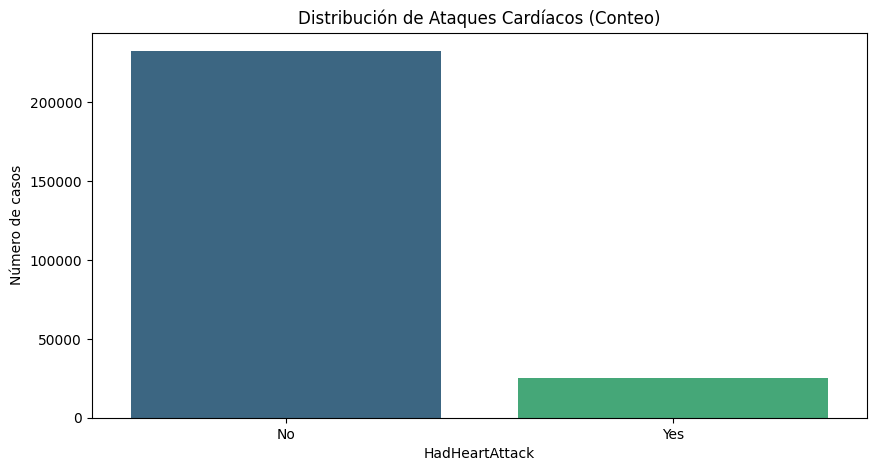

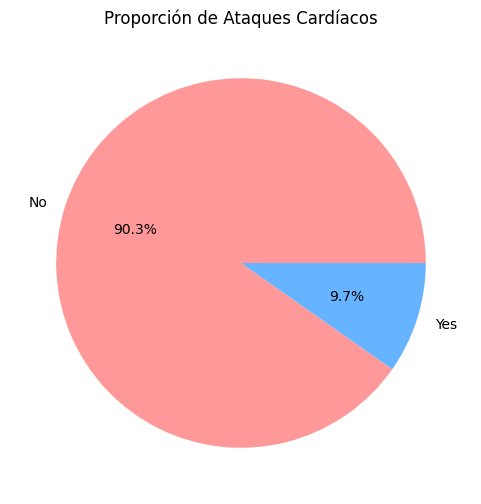

In [33]:


# 1. Conteo de clases
class_counts = df_Prueba['HadHeartAttack'].value_counts()

# 2. Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribución de Ataques Cardíacos (Conteo)")
plt.xlabel("HadHeartAttack")
plt.ylabel("Número de casos")
plt.show()

# 3. Gráfico de pastel (porcentajes)
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Proporción de Ataques Cardíacos")
plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 17576, number of negative: 162804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

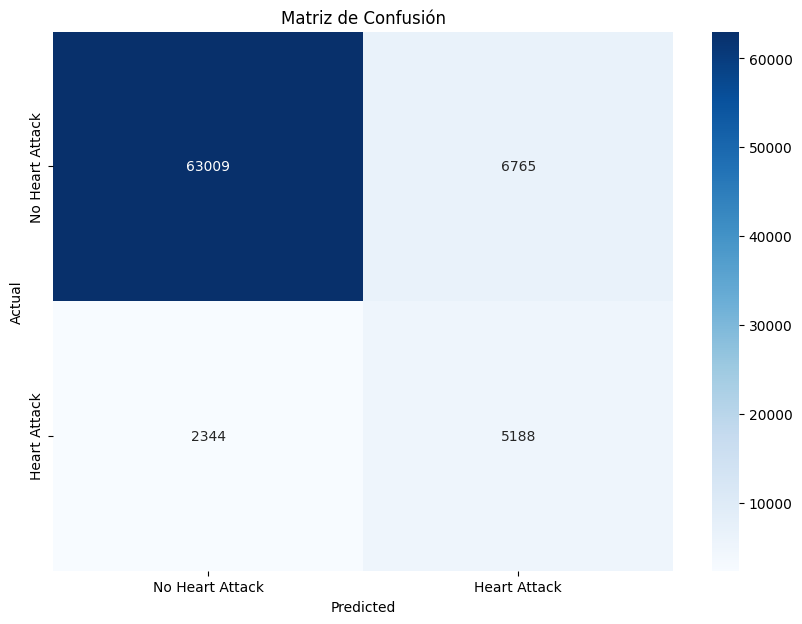

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


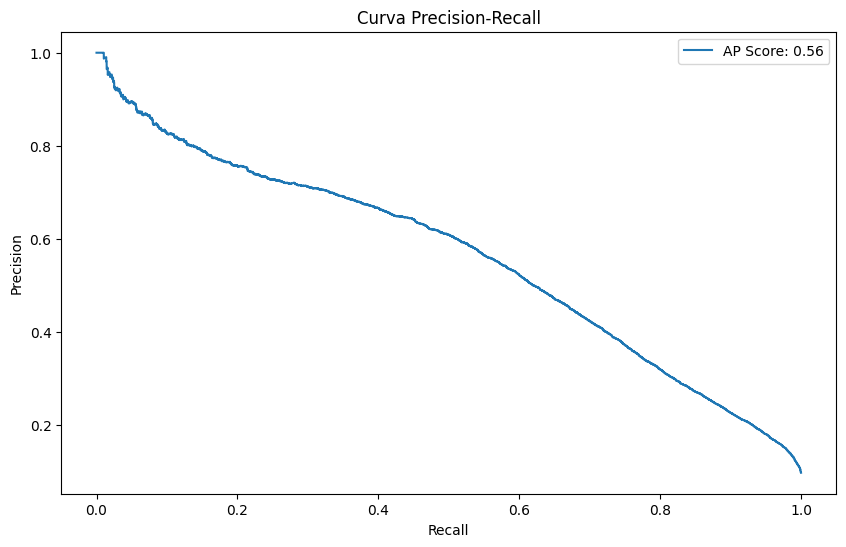

In [34]:


# 1. Preparación de Datos
# --------------------------------------------------
target_column = "HadHeartAttack"

# Convertir la variable objetivo a categórica directamente
df_Prueba[target_column] = df_Prueba[target_column].astype('category')

# Definir variables predictoras (X) y la variable objetivo (y)
X = df_Prueba.drop(columns=columnas_a_eliminar)  # Elimina todo de una vez
y = df_Prueba[target_column]  # Mantenemos como categoría

# Identificar columnas categóricas en X
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
X[categorical_columns] = X[categorical_columns].astype('category')

# 2. División de Datos
# --------------------------------------------------
# Dividir manteniendo las categorías originales
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=87, stratify=y
)

# 3. Configuración y Entrenamiento del Modelo
# --------------------------------------------------
lgb_model = lgb.LGBMClassifier(
    boosting_type='goss',  # Gradient-based One-Side Sampling
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=15,
    num_leaves=31,
    min_child_samples=50,
    reg_alpha=0.5,
    reg_lambda=0.5,
    class_weight={'No': 1, 'Yes': 5},
    random_state=42,
    objective='binary',
    metric='aucpr',
    n_jobs=-1,
    importance_type='gain',
    min_data_in_leaf=100,
    cat_smooth=20,
    extra_trees=True
)

# Entrenamiento con early stopping (una sola vez)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='binary_logloss',
    categorical_feature=categorical_columns,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 4. Predicción y Evaluación
# --------------------------------------------------
# Realizar predicciones (ya están en las categorías originales)
y_pred = lgb_model.predict(X_test)

# Calcular métricas directamente con las categorías
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Imprimir métricas
print("\nMétricas de Evaluación:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 5. Visualización
# --------------------------------------------------
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Curva Precision-Recall (Opcional)

y_probs = lgb_model.predict_proba(X_test)[:, 1]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_probs, pos_label='Yes')
ap_score = average_precision_score(y_test, y_probs, pos_label='Yes')

plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, label=f'AP Score: {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()